In [21]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd
import utils


In [2]:
def load_data():
    dataset = pd.read_excel('data.xlsx')
    print("\n")
    print('Loading Dataset shape: {}'.format(dataset.shape))
    return dataset

In [3]:
dataset = load_data()
dataset = utils.preprocess(dataset)
dataset = utils.create_columns_from_liwc(dataset)



Loading Dataset shape: (1778, 8)


In [4]:
dataset.shape

(1778, 12)

<AxesSubplot:>

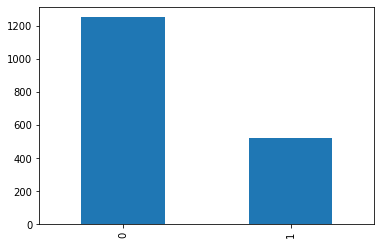

In [5]:
dataset.is_subjective_label.value_counts().plot(kind='bar')

In [6]:
    liwc_features = ['compare (Comparisons)',
                'affect (Affect)',
                'posemo (Positive Emotions)',
                'negemo (Negative Emotions)']

In [7]:
liwc_data = dataset[liwc_features].copy()

In [8]:
target = dataset.is_subjective_label.copy()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(liwc_data.to_numpy(), target, stratify=target, random_state=0)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1333, 4), (445, 4), (1333,), (445,))

In [15]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:00<00:00, 238.30it/s]


In [25]:
from sklearn.tree import DecisionTreeClassifier


In [26]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[310   4]
 [128   3]]
              precision    recall  f1-score   support

           0       0.71      0.99      0.82       314
           1       0.43      0.02      0.04       131

    accuracy                           0.70       445
   macro avg       0.57      0.51      0.43       445
weighted avg       0.63      0.70      0.59       445

